<a href="https://colab.research.google.com/github/shubhigupta991/Reddit-Flair-Detection/blob/main/scripts/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Showing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("drive/MyDrive/data.csv")
data.head()

FileNotFoundError: ignored

In [2]:
data.fillna("None",inplace = True)

In [3]:
data.isna().sum()

title                0
id                   0
score                0
url                  0
num_of_comments      0
body                 0
author               0
comments             0
flair                0
timestamp            0
combined_features    0
dtype: int64

## Data Preprocessing and Model Fitting

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
def fit_and_score(models,X_train,y_train,X_test,y_test) :
    '''
    Fits and evaluate given machine learning model.
    
    Parameters:-
    models = Take a dictionary of models to fit and evaluate.
    X_train = Training data without labels.
    y_train = Training labels.
    X_test = Test data without labels.
    y_test = Test labels
    '''
    
    np.random.seed(21)
    model_scores = {}
    for model_name, model in models.items() :
        model = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  (model_name, model)])
        print(f'Fitting {model_name} .....')
        model.fit(X_train,y_train)
        print(f'Evaluating {model_name} .....')
        model_scores[model_name] = model.score(X_test,y_test)
        
    return model_scores

In [6]:
models = {'LogisticRegression' : LogisticRegression(),
          'Linear_svm' : SGDClassifier(),
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier' : RandomForestClassifier(),
          'XGBClassifier' : XGBClassifier()}

In [9]:
features = {'combined_features' : data['combined_features'],
'comments' : data['comments'],
'title' : data['title'],
'body' : data['body'],
'url' : data['url']}   

cat = data['flair']

In [10]:
scores = {}

for feature in features:

  X_train,X_test,y_train,y_test = train_test_split(features[feature],cat,test_size=0.2, random_state = 21)
  print(f'Flair Detection using {feature} as Feature')
  model_scores = fit_and_score(models,X_train,y_train,X_test,y_test)

  scores[feature] =  model_scores

Flair Detection using combined_features as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluating XGBClassifier .....
Flair Detection using comments as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluating XGBClassifier .....
Flair Detection using title as Feature
Fitting LogisticRegression .....
Evaluating LogisticRegression .....
Fitting Linear_svm .....
Evaluating Linear_svm .....
Fitting KNN .....
Evaluating KNN .....
Fitting RandomForestClassifier .....
Evaluating RandomForestClassifier .....
Fitting XGBClassifier .....
Evaluati

In [11]:
scores

{'body': {'KNN': 0.28688524590163933,
  'Linear_svm': 0.3360655737704918,
  'LogisticRegression': 0.30327868852459017,
  'RandomForestClassifier': 0.3975409836065574,
  'XGBClassifier': 0.4180327868852459},
 'combined_features': {'KNN': 0.5204918032786885,
  'Linear_svm': 0.7581967213114754,
  'LogisticRegression': 0.7336065573770492,
  'RandomForestClassifier': 0.7663934426229508,
  'XGBClassifier': 0.8565573770491803},
 'comments': {'KNN': 0.3442622950819672,
  'Linear_svm': 0.44672131147540983,
  'LogisticRegression': 0.4385245901639344,
  'RandomForestClassifier': 0.4016393442622951,
  'XGBClassifier': 0.4139344262295082},
 'title': {'KNN': 0.5327868852459017,
  'Linear_svm': 0.6557377049180327,
  'LogisticRegression': 0.6926229508196722,
  'RandomForestClassifier': 0.7090163934426229,
  'XGBClassifier': 0.6639344262295082},
 'url': {'KNN': 0.21311475409836064,
  'Linear_svm': 0.319672131147541,
  'LogisticRegression': 0.30327868852459017,
  'RandomForestClassifier': 0.258196721311

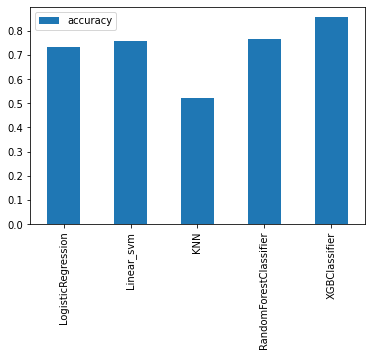

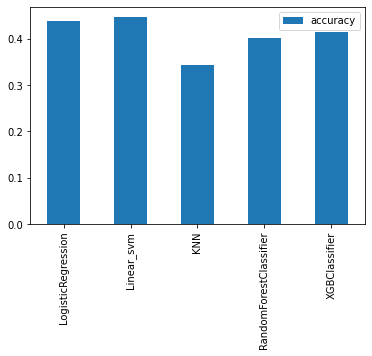

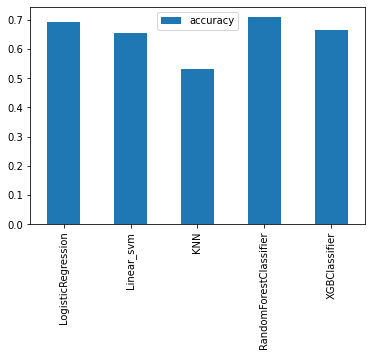

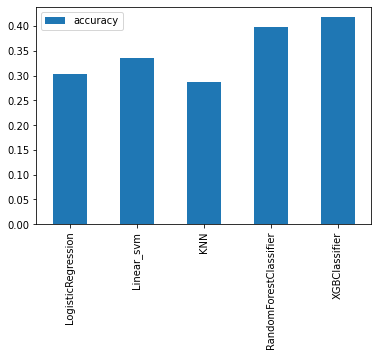

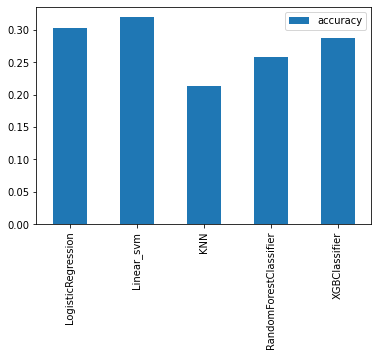

In [14]:
for feature,score in scores.items():
  model_compare = pd.DataFrame(score,index = ['accuracy'])
  print(feature)

## Best Model 
By observing the above results I concluded that the model that gives the best result is `XGBClassifier` and the best feature for predicting flair is `combined_features`.



In [ ]:
X = data['combined_features']
y = data['flair']

np.random.seed(21)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', XGBClassifier())])
model.fit(X_train,y_train)
model_score = model.score(X_test,y_test)
print(f'Model score : {model_score}')

## Improving a model
First prediction = baseline prediction First model = baseline model

From data perspective:

* Could we collect more data. (generally,the more data, the better)
* Can we improve data? (adding more reliable features)

From a model perspective:

* Is there a better model we can use? (Refer - sklearn ml map)
* Could we imporove our model? (Tuning Hyperparameters)
Parameters vs HyperParameters

Parameters :- model find these patterns
* Hyperparameters :- settings on model we can adjust(potentially) to improve its ability to find patterns

Three ways to adjust Hyperparameters:-

`By hand`

`Randomly with RandomSearchCV`

`Exhaustively with GridSearchCV`

### **Hyperparamter Tuning with GridSearchCV**
I am using the method `Hyperparamter Tuning with GridSearchCV` because I probably find this to be the best way.

Since our XGBClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_grid = {
    'n_estimators' : [100,500,1000],
    'verbosity' : [1,2],
    'seed' : 2,
    'colsample_bytree' : [0.5,0.6,1],
    'subsample' : [0.5,0.7,1],
    'objective' : 'multi:softmax'
}

In [ ]:
X = data['combined_features']
y = data['flair']

np.random.seed(21)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', XGBClassifier())])

gs_model = GridSearchCV(estimator=model,
                        param_grid=grid,
                        cv=5, verbose=2)

gs_model.fit(X_train,y_train)

In [ ]:
gs_model.best_params

In [ ]:
gs_model.score(X_test,y_test)

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels 
    on a classification model.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy' : round(accuracy,2), 
                   'precision' : round(precision,2),
                   'recall' : round(recall,2),
                   'f1' : round(f1,2)}
    print(f'Acc : {accuracy *100:.2f}%')
    print(f'Precision : {precision *100:.2f}%')
    print(f'Recall : {recall *100.:2f}%')
    print(f'F1 : {f1 *100:.2f}%')
    
    return metric_dict

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
y_preds = gs_model.predict(X_test)

In [ ]:
score_metrics = evaluate_preds(y_test,y_preds)

In [ ]:
score_metrics = pd.DataFrame(score_metrics)

score_metrics.T.plot.bar(title="Classification metrics",
                      legend=False);

In [ ]:
plot_roc_curve(gs_model, X, y);

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(conf_mat):
    '''
    Plot Confusion matrix.
    '''
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(conf_mat, annot =True,
                     cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

## Saving a Machine learning model


In [ ]:
final_model = 

In [ ]:
import pickle

pickle.dump(gs_clf,open('gs_random_forest_classifier.pkl -1','wb'))